In [118]:
import pandas as pd
import numpy as np

df = pd.read_csv('bike-sharing-demand/bike_train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### 1. datetime 데이터를 object가 아닌 datetime dtype으로 변환
- 시계열 데이터를 가공하기 더 쉽게하기위해

In [120]:
df['datetime'] = df.datetime.apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### 2. datetime 컬럼에서 년/월/일/시 를 쪼개서 새로운 컬럼 생성
#### 3. casual+registered = count 데이터이기 때문에 서로 상관도가 매우 높다. 따라서 casual, registered, datetime 컬럼 제거 

In [121]:
df['year'] = df['datetime'].apply(lambda x : x.year)
df['month'] = df['datetime'].apply(lambda x : x.month)
df['day'] = df['datetime'].apply(lambda x : x.day)
df['hour'] = df['datetime'].apply(lambda x : x.hour)

df.drop(['datetime','casual','registered'], axis=1, inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB
None


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


#### 4. rmsle, rmse, mae 성능평가를 위해 reg_eval 함수 생성

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    scaled_target = np.log1p(y)
    scaled_pred = np.log1p(pred)
    squared_error = (scaled_target - scaled_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))
    
def reg_eval(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y,pred)
    print(f'RMSLE : {rmsle_val : .3f}, RMSE : {rmse_val : .3f}, MAE : {mae_val : .3f} ')

In [173]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

X_data = df.drop('count',axis=1)
y_target = df['count']

X_train, X_test, y_train, y_test = train_test_split(X_data ,y_target,
                                                   test_size=0.3,
                                                   random_state=11)
lr_reg= LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

reg_eval(y_test, pred)

RMSLE :  1.176, RMSE :  143.308, MAE :  107.367 


#### 오차가 어느정도인지 확인

In [174]:
count_df = pd.DataFrame(y_test.values, columns=['real_count'])
count_df['predicted_count'] = np.round(pred)
count_df['diff'] = np.abs(count_df['real_count'] - count_df['predicted_count'])
count_df = count_df.sort_values('diff', ascending=False)[:20]
count_df

,real_count,predicted_count,diff
537,835,213.0,622.0
2860,809,194.0,615.0
1259,784,179.0,605.0
2098,731,142.0,589.0
887,968,406.0,562.0
276,766,219.0,547.0
1241,856,310.0,546.0
748,758,214.0,544.0
1704,662,121.0,541.0
2093,745,210.0,535.0


#### 5. RMSLE, RMSE 성능이 안좋게 나왔으므로 target 데이터를 log변환 한 후 학습
- 선형회귀에서는 feature, target값 모두 정규분포를 띄는 형태여야 성능이 향상된다

In [175]:
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target_log,
                                                   test_size=0.3,
                                                   random_state=11)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
reg_eval(y_test, pred)

RMSLE :  0.233, RMSE :  1.027, MAE :  0.811 


#### 6. target값 log변환 후에도 큰 차이가 없기때문에 회귀계수 확인
- year가 상관관계가 가장높다는 일반적이지 않은 결과가 나옴
- classification과 다르게 선형회귀에서는 one-hot-encoding 필수임을 알수있음

<AxesSubplot:>

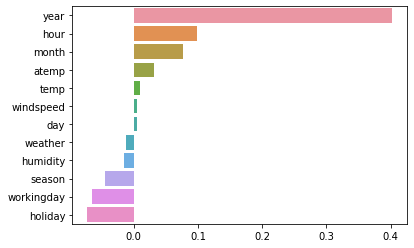

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

coef = pd.Series(lr_reg.coef_, index=X_data.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort, y=coef_sort.index)

In [178]:
X_data_ohe = pd.get_dummies(X_data, columns=['year','month','hour','holiday','workingday','season','weather'])
X_data_ohe.head()

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0


#### 7. 원핫 인코딩을 수행한 데이터로 성능평가

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_data_ohe, y_target_log,
                                                   test_size=0.3,
                                                   random_state=11)
    
lr_reg= LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE : ', rmse)

RMSE :  700962793298060.1


<AxesSubplot:>

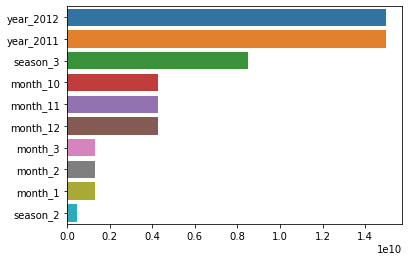

In [180]:
coef = pd.Series(lr_reg.coef_ , index=X_data_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index)